In [2]:
%autosave 300

Autosaving every 300 seconds


In [62]:
!pip install bert-tokenizer


     |████████████████████████████████| 1.2 MB 969 kB/s eta 0:00:01


- https://www.kaggle.com/colearninglounge/nlp-model-building-transformers-attention-more#DistilBERT-Model
- https://www.kaggle.com/mysfali/bert-transfer-learning-for-imdb-50k-movie-review

# import package

In [1]:
import datetime
import collections
import string
import re
import nltk
from tensorflow.keras import layers
import bert
import bert_tokenizer as tokenizer
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Layer, InputSpec

import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
from tokenizers import BertWordPieceTokenizer
from keras.preprocessing.text import Tokenizer
# from tensorflow import keras 
# import keras
from keras.layers import Concatenate, BatchNormalization, Bidirectional,SpatialDropout1D,GlobalAveragePooling1D
# from keras.layers import SimpleRNN, Input, Dropout, Flatten
# from keras.layers.embeddings import Embedding
# from keras.layers.core import Dense, Activation
# from keras.layers.recurrent import LSTM
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.preprocessing.text import Tokenizer
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from tqdm import tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing, impute, utils, linear_model, feature_selection, model_selection, metrics, decomposition, cluster, ensemble
from  sklearn.metrics import classification_report 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing import text, sequence
import tensorflow_hub as hub
import tensorflow_text as text
# from official.nlp import optimization 

warnings.filterwarnings("ignore")
os.chdir('/data/jyu29/')
#######
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
from official.nlp.data import classifier_data_lib
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_text as text  # Registers the ops.
import os 
import tensorflow as tf
import tensorflow_hub as hub
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
import seaborn as sns
import transformers
from transformers import BertConfig, TFBertModel
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
# import wandb
# from wandb.keras import WandbCallback
print('package load complete')

/home/guandata/anaconda/envs/ai_forecast/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


package load complete


## utlis

In [7]:
def read_excel(file_folder,file_name):
    input_data = pd.read_csv(os.path.join(file_folder, file_name), header=0, index_col=None)
    return input_data

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

def start_index(x):
    text = x[0]
    selected = x[1]
    text = text.split()
    selected = selected.split()
    try:
        word = selected[0]
        index = text.index(word)
    except:
        index = 0
    return index

def end_index(x):
    text = x[0]
    selected = x[1]
    start_index = x[2]
    text = text.split()
    selected = selected.split()
    word = selected[-1]
    try:
        index = text.index(word, start_index)
    except:
        try:
            index = text.index(word)
        except:
            index = len(text) - 1
    return index

def create_label_class_dictionary(data, column):
    # create_label_class_dictionary(df, "label")
    '''dictionary for text class with interger number
    data: data file
    column: column name in the data file: must be string format
    '''
    
    dtf = data
    dtf[column+"_id"] = dtf[column].factorize(sort=True)[0]
    dic_class_mapping = dict( dtf[[column+"_id",column]].drop_duplicates().sort_values(column+"_id").values )
    return dtf, dic_class_mapping


def class_report(y,ypred,keys):
    labels = list(dic_y_mapping.values())

    labels_num = list(dic_y_mapping.keys())

    conf_mat = confusion_matrix(y, ypred)
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels, yticklabels=labels_num,cmap="Blues")
    plt.ylabel('actual results',fontsize=12);
    plt.xlabel('predict result',fontsize=12)
    print('*'*100)
    print('accuracy %s' % accuracy_score(y, ypred))
    print('weighted precision score:%s' % precision_score(y, ypred,average='weighted'))
    print('weighted recall score:%s' % recall_score(y, ypred,average='weighted'))
    print('weighted f1 score:%s' % f1_score(y, ypred,average='weighted'))
    print('*'*90)
    print(classification_report(y, ypred,target_names=[str(w) for w in labels]))

    
    


## read data

In [3]:
file_folder = 'data/csv'
file_name = 'SemEval16T6_Restaurants_subtask1.csv'
print('preprocessing: ', file_folder)
df = read_excel(file_folder,file_name)
df.head(2)

preprocessing:  data/csv


,RID,SID,text,polarity,category,target
0,1004293,1004293:0,Judging from previous posts this used to be a ...,negative,RESTAURANT#GENERAL,place
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",negative,SERVICE#GENERAL,staff


# data processing

In [4]:
df['text'] = df['text'].astype(str)
df['target'] = df['target'].astype(str)
df = df.rename({'target':'selected_text','text':'text'},axis=1)
# df['clean_text'] = df['text'].apply(remove_stopword)
df['clean_text'] = df['text'].apply(lambda x:text_preprocessing(x))
# df['clean_text_selected'] = df['target'].apply(remove_stopword)
df['clean_text_selected'] = df['selected_text'].apply(lambda x:text_preprocessing(x))

df.drop(df[df['clean_text_selected'].apply(
    lambda x: len(x)) == 0].index, inplace=True)
df['start_index'] = df[['clean_text', 'clean_text_selected']].apply(
    lambda x: start_index(x), axis=1)
df['end_index'] = df[['clean_text', 'clean_text_selected', 'start_index']].apply(
    lambda x: end_index(x), axis=1)

In [5]:
y = np.zeros((df.shape[0], max(text_split)))
for i in range(df.shape[0]):
    start = df['start_index'][i]
    end = df['end_index'][i]
    y[i][start:end+1] = 1

NameError: name 'text_split' is not defined

In [6]:
df, dic_y_mapping = create_label_class_dictionary(df, "category")

In [6]:
df.sample(1)

,RID,SID,text,polarity,category,selected_text,clean_text,clean_text_selected,start_index,end_index,category_id
739,1572033,1572033:0,Don't dine at Tamarind for the vegetarian dish...,negative,FOOD#QUALITY,vegetarian dishes,not dine tamarind vegetarian dishes simply not...,vegetarian dishes,3,4,5


## split data

In [ ]:
# train, test = train_test_split(df, test_size=0.15)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(df['clean_text'],df['category_id'], stratify=df['category_id'])


## model compile

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# 	# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
# model.summary()

# baseline 

In [16]:
X = df.clean_text.values
y = df.category_id.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.2, random_state=2020)

In [36]:
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

In [37]:
# Compute predicted probabilities
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)
probs = clf.predict(X_val_tfidf)
# yhat = probs.argmax(axis = 1) # predict label

# Evaluate the classifier
# evaluate_roc(probs, y_val)

****************************************************************************************************
accuracy 0.4243027888446215
weighted precision score:0.3915271759294827
weighted recall score:0.4243027888446215
weighted f1 score:0.39761612999999285
******************************************************************************************
                          precision    recall  f1-score   support

        AMBIENCE#GENERAL       0.45      0.24      0.31        63
           DRINKS#PRICES       0.00      0.00      0.00         5
          DRINKS#QUALITY       0.17      0.08      0.11        12
    DRINKS#STYLE_OPTIONS       0.00      0.00      0.00         7
             FOOD#PRICES       0.27      0.12      0.17        24
            FOOD#QUALITY       0.47      0.59      0.52       156
      FOOD#STYLE_OPTIONS       0.06      0.04      0.05        23
        LOCATION#GENERAL       0.00      0.00      0.00         8
      RESTAURANT#GENERAL       0.48      0.59      0.53       

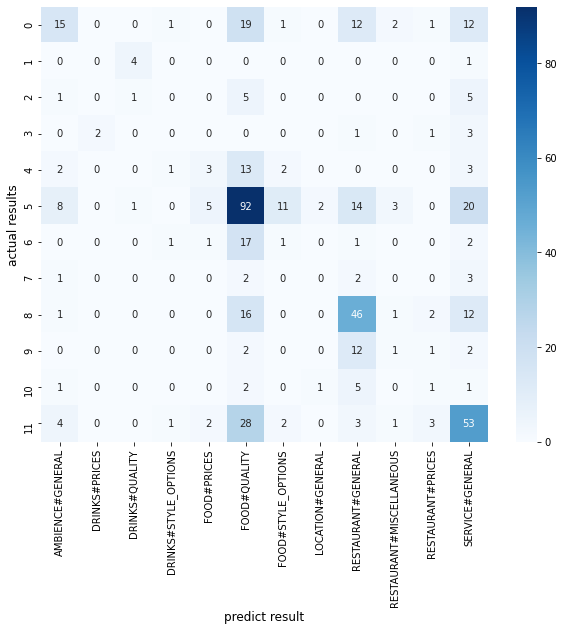

In [51]:
class_report(y_val,probs,keys=dic_y_mapping)

# Lstm

In [8]:
train, test = train_test_split(df, test_size=0.2)


In [15]:
from keras.preprocessing import text, sequence

train.text=train.selected_text.astype(str)
test.text=test.selected_text.astype(str)



tk=text.Tokenizer(num_words=20000)
maxlen = 100



tk.fit_on_texts(list(train.text.values)+list(test.text.values))
x_train =tk.texts_to_sequences(train.text.values)
x_test=tk.texts_to_sequences(test.text.values)



x_train=sequence.pad_sequences(x_train, maxlen=maxlen)
print(x_train.shape)

x_test=sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_test.shape)

(2005, 100)
(502, 100)


In [16]:
y_train = train['category_id'].values
y_test = test['category_id'].values

In [57]:
embeddings_index = {}
with open('data/glove.840B.300d.txt') as f:
    for line in tqdm(f):
        values = line.split(' ')
        word = values[0]
        coefs = np.asarray([float(val) for val in values[1:]])
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

2196018it [02:51, 12775.96it/s]

Found 2196017 word vectors.


In [59]:
embedding_matrix=np.zeros((len(word_index)+1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [60]:
vocab_size = 5000
embedding_dim = 256

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim))
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(12, activation='softmax'))


# lstm = Bidirectional(LSTM(128, return_sequences=True,
#                           dropout=0.15, name='LSTM'))(con)  # lstm

# # dense layers with drop outs and batch normalization
# m = Dense(128, activation="relu",
#           kernel_regularizer=regularizers.l2(0.0001))(lstm)
# m = Dropout(0.3)(m)
# # m = BatchNormalization()(m)
# output = Dense(1, activation='sigmoid', name='output')(m)

# model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
	# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              1050624   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                          

In [61]:
history = model.fit(x_train,
                    y_train,
#                     callbacks=[checkpoint],
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 12s 245ms/step - loss: 2.2094 - accuracy: 0.3212 - val_loss: 2.2765 - val_accuracy: 0.5120
Epoch 2/10
32/32 [==============================] - 7s 215ms/step - loss: 1.4687 - accuracy: 0.5940 - val_loss: 2.0889 - val_accuracy: 0.4462
Epoch 3/10
32/32 [==============================] - 7s 218ms/step - loss: 1.1385 - accuracy: 0.6559 - val_loss: 1.9571 - val_accuracy: 0.4980
Epoch 4/10
32/32 [==============================] - 7s 215ms/step - loss: 0.9957 - accuracy: 0.6853 - val_loss: 1.8951 - val_accuracy: 0.5040
Epoch 5/10
32/32 [==============================] - 7s 216ms/step - loss: 0.9331 - accuracy: 0.6978 - val_loss: 1.8078 - val_accuracy: 0.5159
Epoch 6/10
32/32 [==============================] - 7s 215ms/step - loss: 0.8966 - accuracy: 0.7022 - val_loss: 1.7475 - val_accuracy: 0.5199
Epoch 7/10
32/32 [==============================] - 7s 216ms/step - loss: 0.8632 - accuracy: 0.7107 - val_loss: 1.6167 - val_accuracy: 0.5677
Epoch

****************************************************************************************************
accuracy 0.6434262948207171
weighted precision score:0.6285514478216874
weighted recall score:0.6434262948207171
weighted f1 score:0.601137807870027
******************************************************************************************
                          precision    recall  f1-score   support

        AMBIENCE#GENERAL       0.94      0.50      0.65        58
           DRINKS#PRICES       0.00      0.00      0.00         3
          DRINKS#QUALITY       0.78      0.54      0.64        13
    DRINKS#STYLE_OPTIONS       0.75      0.86      0.80         7
             FOOD#PRICES       0.00      0.00      0.00        28
            FOOD#QUALITY       0.68      0.88      0.77       153
      FOOD#STYLE_OPTIONS       0.46      0.20      0.28        30
        LOCATION#GENERAL       1.00      0.25      0.40         4
      RESTAURANT#GENERAL       0.46      0.89      0.61        9

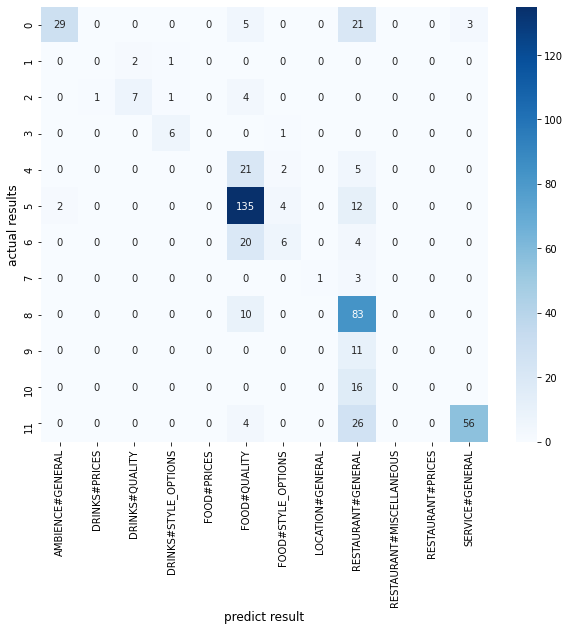

In [62]:
y_pred = model.predict(x_test) 
yhat = y_pred.argmax(axis = 1) # predict label
class_report(y=y_test,ypred=yhat,keys=dic_y_mapping)

## attention layer

In [ ]:
# def model_lstm_atten(embedding_matrix):
#     inp = Input(shape=(maxlen,))
#     x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
#     x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
#     x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
#     x = AttentionWithContext()(x)
#     x = Dense(64, activation="relu")(x)
#     x = Dense(1, activation="sigmoid")(x)
#     model = Model(inputs=inp, outputs=x)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

## simple model structure

In [66]:
def CNN_V0(bert_output):
    net = Conv1D(128, 7, activation='relu',padding='same')(bert_output)
    net = MaxPooling1D()(net)
    net = Conv1D(256, 5, activation='relu',padding='same')(net)
    net = MaxPooling1D()(net)
    net = Conv1D(512, 3, activation='relu',padding='same')(net)
    net = MaxPooling1D()(net)
    net = Flatten()(net)
    net = Dense(128, activation='relu')(net)
    net = Dropout(0.5)(net)
    outputs = Dense(12, activation='softmax', name='classifier')(net) 
    return outputs

In [67]:
def BiLSTM_V0(bert_output):
    net = Bidirectional(LSTM(units=128, return_sequences=True,))(bert_output)
    net = GlobalAveragePooling1D()(net)
    net = Dense(64, activation='relu')(net)
    net = Dropout(rate=0.1)(net)
    outputs = Dense(12, activation='softmax', name='classifier')(net) 
    return outputs

In [68]:
def CNN_LSTM_V0(bert_output):
    net = Dropout(0.3)(bert_output)
    net = Conv1D(200, 5, activation='relu')(net)
    net = MaxPooling1D(pool_size=2)(net)
    net = LSTM(100)(net)
    net = Dropout(0.3)(net)
    net = Dense(32,activation='relu')(net)
    outputs = Dense(12, activation='softmax', name='classifier')(net)
    return outputs

In [69]:
def CNN_LSTM_V1(bert_output):

    # channel 1
    net = Conv1D(filters=128, kernel_size=3*32, activation='relu')(bert_output)
    net = MaxPooling1D(pool_size=2)(net)
    net = Dropout(0.5)(net)
    net = BatchNormalization()(net)
    a = LSTM(128)(net)

    # channel 2
    net = Conv1D(filters=128, kernel_size=5*32, activation='relu')(bert_output)
    net = MaxPooling1D(pool_size=2)(net)
    net = Dropout(0.5)(net)
    net = BatchNormalization()(net)
    b = LSTM(128)(net)

    # channel 3
    net = Conv1D(filters=128, kernel_size=7*32, activation='relu')(bert_output)
    net = MaxPooling1D(pool_size=2)(net)
    net = Dropout(0.5)(net)
    net = BatchNormalization()(net)
    c = LSTM(128)(net)

    # channel 4
    net = Conv1D(filters=128, kernel_size=9*32, activation='relu')(bert_output)
    net = MaxPooling1D(pool_size=2)(net)
    net = Dropout(0.5)(net)
    net = BatchNormalization()(net)
    d = LSTM(128)(net)

    merged = concatenate([a,b,c,d])
    dense = Dense(100, activation='relu')(merged)
    drop = Dropout(0.2)(dense)
    outputs = Dense(12, activation='softmax')(merged)
    return outputs

In [71]:
def LSTM_CNN_V0(bert_output):
    net = Bidirectional(LSTM(128, return_sequences=True))(bert_output)
    net = Conv1D(128, 7, activation='relu',padding='same')(net)
    net = MaxPooling1D()(net)
    net = Conv1D(256, 5, activation='relu',padding='same')(net)
    net = MaxPooling1D()(net)
    net = Conv1D(512, 3, activation='relu',padding='same')(net)
    net = MaxPooling1D()(net)
    net = Flatten()(net)
    net = Dense(128, activation='relu')(net)
    net = Dropout(0.5)(net)
    outputs = Dense(12,activation='softmax', name='classifier')(net) 
    return outputs

In [ ]:
    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

# bert

In [8]:
process_url = 'pretrained_model/bert_en_uncased_preprocess_3'
bert_encoder = hub.KerasLayer(process_url)

model_url = 'pretrained_model/bert_en_uncased_L-12_H-768_A-12_4'
bert_layer= hub.KerasLayer(model_url)

In [ ]:
config = {'label_list' : [0, 1], # Label categories
          'max_seq_length' : 128, # maximum length of (token) input sequences
          'train_batch_size' : 32,
          'learning_rate': 2e-5,
          'epochs':5,
          'optimizer': 'adam',
          'dropout': 0.2,
          'train_samples': len(train_data),
          'valid_samples': len(test_data),
          'train_split':0.1,
          'valid_split': 0.01
         }

In [55]:
x = df.clean_text.values
y = df.category_id.values
# train_df, test_df = train_test_split(df, \
#                                      random_state=42, train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'],df['category_id'], stratify=df['category_id'])


In [57]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_encoder(text_input)
outputs = bert_layer(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(12, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])
	# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [59]:
epochs = config['epochs']
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=epochs,
                    verbose=1)

Epoch 1/5
59/59 [==============================] - 153s 3s/step - loss: 2.4800 - accuracy: 0.1926 - val_loss: 2.3038 - val_accuracy: 0.3110
Epoch 2/5
59/59 [==============================] - 146s 2s/step - loss: 2.2355 - accuracy: 0.3096 - val_loss: 2.1318 - val_accuracy: 0.3381
Epoch 3/5
59/59 [==============================] - 148s 3s/step - loss: 2.1169 - accuracy: 0.3330 - val_loss: 2.0396 - val_accuracy: 0.3381
Epoch 4/5
59/59 [==============================] - 142s 2s/step - loss: 2.0490 - accuracy: 0.3346 - val_loss: 1.9891 - val_accuracy: 0.3381
Epoch 5/5
59/59 [==============================] - 140s 2s/step - loss: 2.0032 - accuracy: 0.3367 - val_loss: 1.9596 - val_accuracy: 0.3381


## v2

In [95]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")  
# this will download the BERT Trained Model
# output_hidden_states=False, as we are training & not interested in output state.
config = BertConfig.from_pretrained("bert-base-uncased",output_hidden_states=False) # dropout=0.2, attention_dropout=0.2
bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [97]:
ids = bert_tokenizer.convert_tokens_to_ids(tokens)
print("convert_tokens_to_ids:",ids)

ids_encode = bert_tokenizer.encode(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode:",ids_encode)

ids_encode_plus = bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode_plus:",ids_encode_plus)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


convert_tokens_to_ids: [2023, 2003, 1037, 2742, 3793, 2008, 2057, 2024, 2478, 2005, 4824, 3800, 1010, 2178, 2773, 2008, 2057, 6069, 2224, 2003, 10556, 24679]


encode: [101, 2023, 2003, 1037, 2742, 3793, 2008, 2057, 2024, 2478, 2005, 4824, 3800, 1010, 2178, 2773, 2008, 2057, 6069, 2224, 2003, 10556, 24679, 102, 0, 0, 0, 0, 0, 0]


encode_plus: {'input_ids': [101, 2023, 2003, 1037, 2742, 3793, 2008, 2057, 2024, 2478, 2005, 4824, 3800, 1010, 2178, 2773, 2008, 2057, 6069, 2224, 2003, 10556, 24679, 102, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]}


In [127]:
# train['review_clean'] = train['review'].apply(clean_text)
sentences = df['clean_text']
target = df.category_id.values
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =128,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)


In [99]:
X_train, X_test, y_train, y_test,train_mask,test_mask=train_test_split(input_ids,
                                                                       target,attention_masks,
                                                                       test_size=0.2)

In [107]:
def create_model(model_):
    input_ids = tf.keras.Input(shape=(128,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,),dtype='int32')
    
    output = model_(input_ids)
    output = output[0]      # this is inline in config.output_hidden_states as we want only the top head
    
    output = output[:,0,:]  #  We are only interested in <cls> or classification token of the model which can be extracted
                            #  using the slice operation. Now we have 2D data and build the network as one desired.
                            #  While converting 3D data to 2D we may miss on valuable info.
    
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(12,activation='softmax')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    
    
    for layer in model.layers[:3]:
        layer.trainable = False
    return model

model = create_model(bert_model)
model.summary()  

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    ((None, 128, 768),   109482240   ['input_5[0][0]']                
                                 (None, 768))                                                     
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 768)         0           ['tf_bert_model[0][0]']          
 ingOpLambda)                                                                                     
                                                                                            

In [108]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit([X_train,train_mask],y_train,batch_size=32,epochs=4,validation_data=([X_test,test_mask],y_test))

Epoch 1/4
63/63 [==============================] - 135s 2s/step - loss: 2.1878 - accuracy: 0.2504 - val_loss: 1.9326 - val_accuracy: 0.3725
Epoch 2/4
63/63 [==============================] - 122s 2s/step - loss: 2.0576 - accuracy: 0.2933 - val_loss: 1.8962 - val_accuracy: 0.3725
Epoch 3/4
63/63 [==============================] - 121s 2s/step - loss: 2.0164 - accuracy: 0.3087 - val_loss: 1.8887 - val_accuracy: 0.3725
Epoch 4/4
63/63 [==============================] - 121s 2s/step - loss: 2.0109 - accuracy: 0.3107 - val_loss: 1.8812 - val_accuracy: 0.3725


## v3

In [111]:
SEQ_LEN = 128


In [109]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')


In [125]:
from transformers import TFAutoModel
bert = TFAutoModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [112]:
tokenizer.encode_plus("hello world", max_length = SEQ_LEN, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')

{'input_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [133]:
Xids = np.zeros((len(df), SEQ_LEN))
Xmask = np.zeros((len(df), SEQ_LEN))

In [134]:
for i, sequence in enumerate(df['clean_text']):
    tokens = tokenizer.encode_plus(sequence, max_length = SEQ_LEN, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [135]:
arr = df['category_id'].values
arr, arr.shape

(array([ 8, 11, 11, ..., 11,  8, 11]), (2507,))

In [136]:
labels = np.zeros((len(df), arr.max() + 1))
labels[np.arange(len(df)), arr] = 1

In [137]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [138]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))
dataset.take(1)

<TakeDataset shapes: ((128,), (128,), (12,)), types: (tf.float64, tf.float64, tf.float64)>

In [139]:
def map_fn(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

dataset = dataset.map(map_fn)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (128,), attention_mask: (128,)}, (12,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [147]:
batch_size = 32
dataset = dataset.shuffle(20000).batch(batch_size, drop_remainder = True)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (32, 16, 128), attention_mask: (32, 16, 128)}, (32, 16, 12)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [141]:
DS_LEN = len(list(dataset))
split = 0.8
train = dataset.take(round(DS_LEN * split))
test_ds = dataset.skip(round(DS_LEN * split))
train_size = len(list(train))
train_ds = train.take(round(train_size * split))
val_ds = train.skip(round(train_size * split))

In [155]:
input_ids = tf.keras.layers.Input(shape = (SEQ_LEN,), name = 'input_ids', dtype = 'int32')
mask = tf.keras.layers.Input(shape = (SEQ_LEN,), name = 'attention_mask', dtype = 'int32')

#Transformer
embeddings = bert.bert(input_ids, attention_mask = mask)[0]

#classifier head
# x = tf.keras.layers.Dense(1024, activation = 'relu')(embeddings)
# y = tf.keras.layers.Dense(2, activation = 'softmax', name = 'outputs')(x)

# X = tf.keras.layers.LSTM(64)(embeddings)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(64, activation='relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
# y = tf.keras.layers.Dense(2, activation = 'softmax', name = 'outputs')(X)

X = tf.keras.layers.Dropout(0.1)(embeddings)
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(768))(X)




# model.add(keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))

y = tf.keras.layers.Dense(12, activation='softmax', name='outputs')(X)


model = tf.keras.Model(inputs = [input_ids, mask], outputs = y)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         ((None, 128, 768),   108310272   ['input_ids[0][0]',              
                                 (None, 768))                     'attention_mask[0][0]']         
                                                                                                  
 dropout_101 (Dropout)          (None, 128, 768)     0           ['bert[5][0]']             

In [158]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001, decay = 1e-6,beta_1=0.9, beta_2=0.9,amsgrad=False,
     name='Adam')
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [159]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
100/100 [==============================] - 168s 2s/step - loss: 0.8289 - accuracy: 0.6769 - val_loss: 0.6798 - val_accuracy: 0.7350
Epoch 2/20
100/100 [==============================] - 158s 2s/step - loss: 0.7546 - accuracy: 0.7056 - val_loss: 0.6541 - val_accuracy: 0.7325
Epoch 3/20
100/100 [==============================] - 159s 2s/step - loss: 0.7512 - accuracy: 0.7125 - val_loss: 0.6127 - val_accuracy: 0.7600
Epoch 4/20
100/100 [==============================] - 159s 2s/step - loss: 0.7184 - accuracy: 0.7056 - val_loss: 0.6341 - val_accuracy: 0.7425
Epoch 5/20
100/100 [==============================] - 159s 2s/step - loss: 0.6959 - accuracy: 0.7237 - val_loss: 0.5829 - val_accuracy: 0.7625
Epoch 6/20
100/100 [==============================] - 159s 2s/step - loss: 0.6911 - accuracy: 0.7237 - val_loss: 0.6143 - val_accuracy: 0.7475
Epoch 7/20
100/100 [==============================] - 163s 2s/step - loss: 0.6898 - accuracy: 0.7256 - val_loss: 0.5668 - val_accuracy: 0.7475

### evluation

In [160]:
history.history

{'loss': [0.8289080858230591,
  0.754568338394165,
  0.751180112361908,
  0.7183821797370911,
  0.6959150433540344,
  0.6910960674285889,
  0.6897872686386108,
  0.6727367639541626,
  0.6819390654563904,
  0.6866177320480347,
  0.6731005907058716,
  0.6836284399032593,
  0.6920446753501892,
  0.6678232550621033,
  0.6519617438316345,
  0.6749523282051086,
  0.6480475664138794,
  0.6733878254890442,
  0.6267149448394775,
  0.6876454949378967],
 'accuracy': [0.6768749952316284,
  0.7056249976158142,
  0.7124999761581421,
  0.7056249976158142,
  0.7237499952316284,
  0.7237499952316284,
  0.7256249785423279,
  0.7243750095367432,
  0.7268750071525574,
  0.7306249737739563,
  0.7250000238418579,
  0.7262499928474426,
  0.7268750071525574,
  0.71875,
  0.7350000143051147,
  0.721875011920929,
  0.734375,
  0.7212499976158142,
  0.7406250238418579,
  0.715624988079071],
 'val_loss': [0.6797513365745544,
  0.654137372970581,
  0.6127145886421204,
  0.6340678930282593,
  0.5828951001167297,
  

In [162]:
train_loss, train_accuracy = model.evaluate(train_ds)

100/100 [==============================] - 79s 794ms/step - loss: 0.5760 - accuracy: 0.7419


In [163]:
print("train_loss: ", train_loss)
print("train_accuracy: ", train_accuracy)

train_loss:  0.5760139226913452
train_accuracy:  0.7418749928474426


In [164]:
test_loss, test_accuracy = model.evaluate(test_ds)

31/31 [==============================] - 25s 790ms/step - loss: 0.5851 - accuracy: 0.7440


In [165]:
print("test_loss: ", test_loss)
print("test_accuracy: ", test_accuracy)

test_loss:  0.5850715041160583
test_accuracy:  0.7439516186714172


In [166]:
dic_y_mapping

{0: 'AMBIENCE#GENERAL',
 1: 'DRINKS#PRICES',
 2: 'DRINKS#QUALITY',
 3: 'DRINKS#STYLE_OPTIONS',
 4: 'FOOD#PRICES',
 5: 'FOOD#QUALITY',
 6: 'FOOD#STYLE_OPTIONS',
 7: 'LOCATION#GENERAL',
 8: 'RESTAURANT#GENERAL',
 9: 'RESTAURANT#MISCELLANEOUS',
 10: 'RESTAURANT#PRICES',
 11: 'SERVICE#GENERAL'}

In [173]:
def pred_text(model, text, max_length = 128):
    tokens = tokenizer.encode_plus(text, max_length = max_length, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')
    probs = model.predict({
        'input_ids': tf.cast(tokens['input_ids'], tf.float64),
        'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)
    })
    
    pred = np.argmax(probs[0])
    
    prediction = dic_y_mapping[pred]
    confidence = probs[0][pred]
    
    return prediction, confidence

In [174]:
text = 'price high food good would come back'
pred_text(model, text)

('FOOD#PRICES', 0.44310364)

### save model

In [181]:
os.getcwd()

'/data/jyu29'

In [184]:
model.save("pretrained_model/aspect_category_model")

INFO:tensorflow:Assets written to: pretrained_model/aspect_category_model/assets


INFO:tensorflow:Assets written to: pretrained_model/aspect_category_model/assets


In [185]:
model_serve = tf.keras.models.load_model('pretrained_model/aspect_category_model')

In [196]:
text='something atmosphere makes come back nearly every week'
pred_text(model_serve, text)

('AMBIENCE#GENERAL', 0.9832991)